Beata Sirowy

# Machine Learning: 
# data preprocessing and modelling
Based on:

Geron, A. (2023) _Hands-On Machine Learning
with Scikit-Learn, Keras, and TensorFlow_ 

Liu, Y. (2020) _Python Machine Learning By Example_


### The Cross-Industry Standard Process for Data Mining (CRISP-DM)

Data mining, a buzzword in the 1990s, is the predecessor of data science. One of the methodologies popular in the data mining
community is called the Cross-Industry Standard Process for Data
Mining (CRISP-DM) (https://en.wikipedia.org/wiki/Cross-industry_standard_process_for_data_mining). 

CRISP-DM
was created in 1996, and machine learning inherits its phases and
general framework.

- __Business understanding:__ This phase is often taken care of by
specialized domain experts. Usually, we have a businessperson
formulate a business problem, such as selling more units of a certain
product.
- __Data understanding:__ This is also a phase that may require input from
domain experts; however, often a technical specialist needs to get
involved more than in the business understanding phase. It's usually
termed __the exploration phase__.
- __Data preparation:__  This is the phase where we create our training and test datasets.
It's usually termed __the preprocessing phase__.
- __Modeling:__ This is the phase most people associate with machine
learning. In this phase, we formulate a model and fit our data.
- __Evaluation:__ In this phase, we evaluate how well the model fits the
data to check whether we were able to solve our business problem.
- __Deployment:__ This phase usually involves setting up the system in a
production environment. Typically, this is done by a specialized
team.

## Basic preprocessing

#### Dealing with missing values

- ignoring - simplest solution but can lead to inaccurate results
- imputing. We can impute the arithmetic mean, median, or mode of the valid values of a certain feature


#### Label encoding

- Machine learning algorithms (with some exceptions) require numerical values. If we offer a
string such as Ivan , unless we're using specialized software, the program
won't know what to do. 
-  We can consider each unique value to be a label.
- We can replace each label with an integer—label encoding.

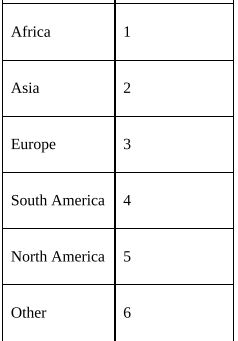

- This approach can be problematic in some cases, because the learner may
conclude that there is an order (unless it is expected, for example, bad=0,
ok=1, good=2, excellent=3).
- One-hot encoding in the next section takes an alternative approach.

#### One-hot encoding

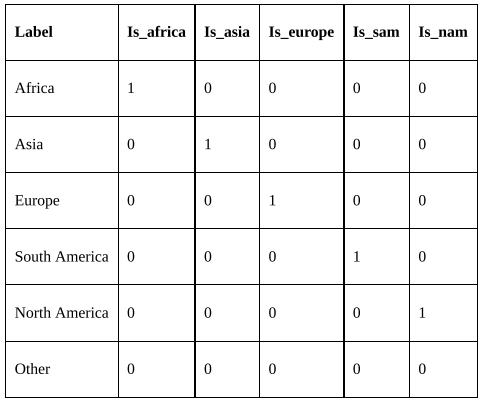

- The one-of-K, or one-hot encoding, scheme uses dummy variables to
encode categorical features. 
- Originally, it was applied to digital circuits.
- The dummy variables have binary values such as bits, so they take the
values zero or one (equivalent to true or false).

This type of matrix is called
a sparse matrix. The sparse matrix representation is handled well by the
the scipy package

#### Scaling

Values of different features can differ by orders of magnitude. Sometimes,
this may mean that the larger values dominate the smaller values. This
depends on the algorithm we're using. For certain algorithms to work
properly, we're required to scale the data.

There are  strategies that we can apply:
- Standardization removes the mean of a feature and divides by the
standard deviation. If the feature values are normally distributed, we
will get a Gaussian, which is centered around zero with a variance of
one.
- If the feature values aren't normally distributed, we can remove the
median and divide by the interquartile range (the range between the first and third
quartile or 25th and 75th percentile).
- Scaling features to a range is a common choice of range between zero
and one.


An advanced version of data preprocessing is usually called feature
engineering.

## Feature engineering

- Feature engineering is the process of creating or improving features. It is
more of a dark art than a science. 
- Features are often created based on
common sense, domain knowledge, or prior experience. 
- There are certain
common techniques for feature creation; however, there is no guarantee that
creating new features will improve your results. 
- We are sometimes able to
use the clusters found by unsupervised learning as extra features. 
- Deep
neural networks are often able to derive features automatically.

#### Polynomial transformation

- If we have two features, a and b, we can suspect that there is a polynomial
relationship, such as a2 + ab + b2
- We can consider each term in the sum to be a feature—in the previous example, we have three features, which are a, b, and a2 + ab + b2.

The number of features and the order of the polynomial for a polynomial
relation aren't limited. 
- However, if we follow Occam's razor, we should
avoid higher-order polynomials and interactions of many features. 
- In practice, complex polynomial relations tend to be more difficult to compute
and tend to overfit, but if you really need better results, they may be worth
considering.

#### Power transforms

- Power transforms are functions that we can use to transform numerical
features to conform better to a normal distribution. 
- A very common
transformation for values that vary by orders of magnitude is to take the
logarithm.

- Taking the logarithm of a zero value and negative values isn't defined, so
we may need to add a constant to all of the values of the related feature
before taking the logarithm. 
- We can also take the square root for positive
values, square the values, or compute any other power we like.

- __The Box-Cox transformation__ attempts to find the best power needed to
transform the original data into data that's closer to the normal distribution.

#### Binning

- Sometimes, it's useful to separate feature values into several bins. For
example, we may only be interested in whether it rained on a particular day.
Given the precipitation values, we can binarize the values, so that we get a
true value if the precipitation value isn't zero, and a false value otherwise.
- We can also use statistics to divide values into high, low, and medium bins.
- In marketing, we often care more about the age group, such as 18 to 24,
than a specific age, such as 23.

The binning process inevitably leads to loss of information. However,
depending on your goals, this may not be an issue, and actually reduces the
chance of overfitting. 
- Certainly, there will be improvements in speed and
reduction of memory or storage requirements and redundancy.






## Data modelling: model aggregation

Any real-world machine learning system should have two modules: __a data
preprocessing module__, which we just covered in this section, and __a
modeling module__, which will be covered next.

A model takes in data (usually preprocessed) and produces predictive
results.

What if we employ multiple models; will we make better decisions
by combining predictions from individual models?

Machine learning models most often cooperate with the
following schemes:
- Voting and averaging
- Bagging
- Boosting
- Stacking

#### Voting and averaging

The final output will be the majority or average of prediction output
values from multiple models. 
- It is also possible to assign different weights
to individual models in the ensemble, for example, some models that are
more reliable might be given two votes.
- Nonetheless, combining the results of models that are highly correlated to
each other doesn't guarantee a spectacular improvement. 
- It is better to
somehow diversify the models by using different features or different
algorithms. 
- If you find two models are strongly correlated, you may, for
example, decide to remove one of them from the ensemble and increase
proportionally the weight of the other model.

#### Bagging (bootstrap aggregating)

- An algorithm introduced by Leo
Breiman, a distinguished statistician at the University of California,
Berkeley, in 1994, which applies bootstrapping to machine learning
problems. 
- Bootstrapping is a statistical procedure that creates multiple
datasets from the existing one by sampling data with replacement.
- Bootstrapping can be used to measure the properties of a model, such as
bias and variance.

In general, a bagging algorithm follows these steps:
1. We generate new training sets from input training data by sampling
with replacement
2. For each generated training set, we fit a new model
3. We combine the results of the models by averaging or majority voting

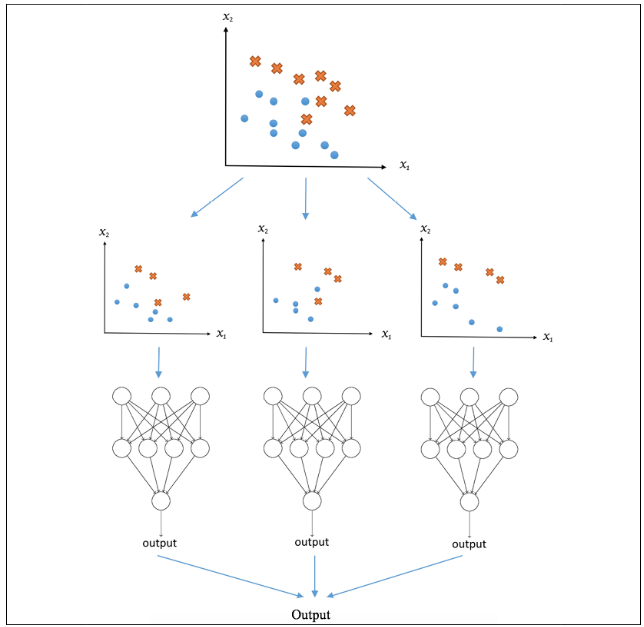

Bagging can reduce the chance of overfitting.

#### Boosting

In the context of supervised learning, we define weak learners as learners
who are just a little better than a baseline, such as randomly assigning
classes or average values. 
- Much like ants, weak learners are weak
individually, but together they have the power to do amazing things.
- It makes sense to take into account the strength of each individual learner
using weights. 
- This general idea is called boosting. 

In boosting, all models are trained in sequence, instead of in parallel as in bagging. 
- Each model is
trained on the same dataset, but each data sample is under a different weight
factoring in the previous model's success. 
- The weights are reassigned after a
model is trained, which will be used for the next training round. 
- In general,
weights for mispredicted samples are increased to stress their prediction
difficulty.

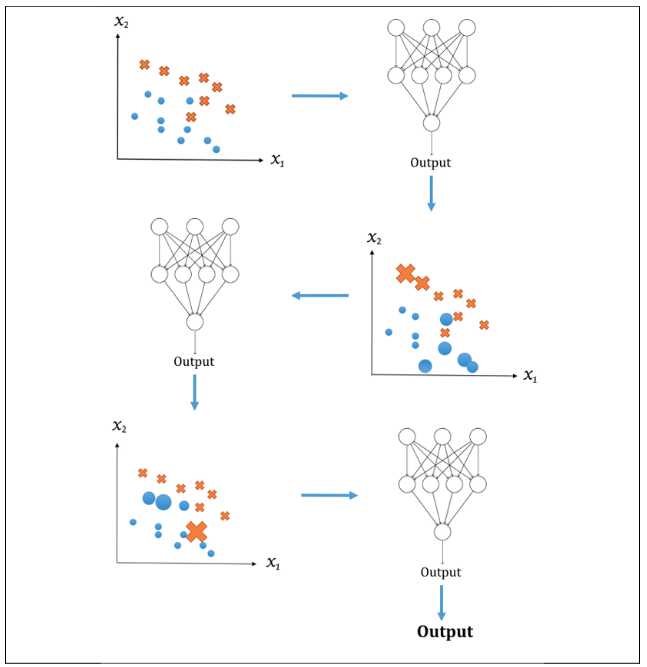

- boosting algorithms differ mostly in
their weighting scheme. 
- If you've studied for an exam, you may have
applied a similar technique by identifying the type of practice questions you
had trouble with and focusing on the hard problems.

Face detection in images is based on a specialized framework that also uses
boosting. Detecting faces in images or videos is supervised learning.
- We give the learner examples of regions containing faces. There's an imbalance,
since we usually have far more regions (about 10,000 times more) that don't
have faces.
- A cascade of classifiers progressively filters out negative image areas stage
by stage. In each progressive stage, the classifiers use progressively more
features on fewer image windows. 
- The idea is to spend the most time on
image patches that contain faces. In this context, boosting is used to select
features and combine results.

#### Stacking

Stacking takes the output values of machine learning models and then uses
them as input values for another algorithm.

- A fun fact is that stacking is commonly used in the winning models in the
Kaggle competition - For instance, the first place for the Otto Group Product
Classification challenge (www.kaggle.com/c/otto-group-
product-classification-challenge) went to a stacking model
composed of more than 30 different models.